# Arbitary

## The Arbitrary Technique replaces missing data in each variable by an arbitrary value determined by the user.

# Only used when the data are not Missing in Random R

## This Technique are used in Both data (Numerical and Categorical)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("./titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
x = df.drop(columns=["Survived"])
y = df.Survived

In [6]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
xtrain["Age_99"] = xtrain.Age.fillna(99)
xtrain["Age_minus1"] = xtrain.Age.fillna(-1)

xtrain["Fare_999"] = xtrain.Fare.fillna(999)
xtrain["Fare_minus1"] = xtrain.Fare.fillna(-1)

In [12]:
xtrain.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
727,NaN,7.7375,0,99.0,-1.0,7.7375,7.7375
638,41.0,39.6875,5,41.0,41.0,39.6875,39.6875
842,30.0,31.0000,0,30.0,30.0,31.0000,31.0000
681,27.0,76.7292,0,27.0,27.0,76.7292,76.7292
38,18.0,18.0000,2,18.0,18.0,18.0000,18.0000


In [16]:
print("Orignal Age Variance\t",xtrain.Age.var())
print("Age 99 Variance\t\t",xtrain.Age_99.var())
print("Age Age_minus1 Variance\t",xtrain.Age_minus1.var())
print()
print("Orignal Fare Variance\t",xtrain.Fare.var())
print("Fare 999 Variance\t",xtrain.Fare_999.var())
print("Fare_minus1 Variance\t",xtrain.Fare_minus1.var())




Orignal Age Variance	 204.3495133904614
Age 99 Variance		 951.7275570187172
Age Age_minus1 Variance	 318.0896202624484

Orignal Fare Variance	 2448.197913706318
Fare 999 Variance	 47219.20265217623
Fare_minus1 Variance	 2378.5676784883503


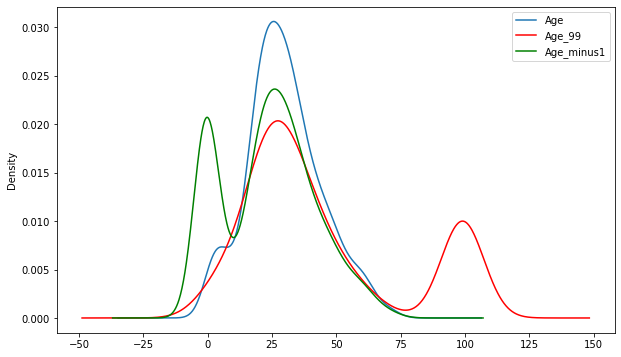

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xtrain.Age.plot(kind="kde",ax=ax)
xtrain.Age_99.plot(kind="kde",ax=ax,color="red")
xtrain.Age_minus1.plot(kind="kde",ax=ax,color="green")

# legend
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

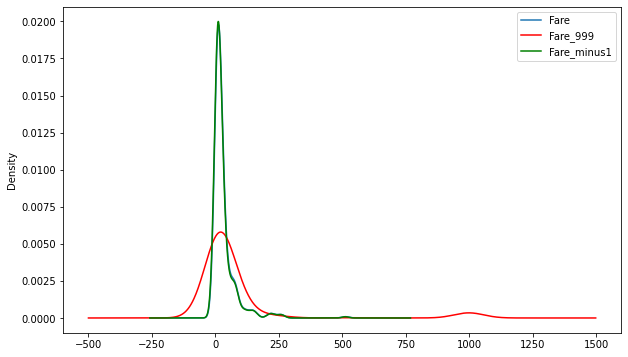

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xtrain.Fare.plot(kind="kde",ax=ax)
xtrain.Fare_999.plot(kind="kde",ax=ax,color="red")
xtrain.Fare_minus1.plot(kind="kde",ax=ax,color="green")

# legend
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

# Using sklearn SimpleImputer

In [19]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
imp1 = SimpleImputer(strategy="constant",fill_value=99)
imp2 = SimpleImputer(strategy="constant",fill_value=999)

In [24]:
trf = ColumnTransformer(
[
    ("imp1",imp1,["Age"]),
    ("imp2",imp2,["Fare"])
],remainder="passthrough"

)

In [26]:
trf.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imp2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [27]:
trf.named_transformers_.imp1.statistics_

array([99.])

In [28]:
trf.named_transformers_.imp2.statistics_

array([999.])

In [29]:
xtrain =  trf.transform(xtrain)
xtest =  trf.transform(xtest)

In [30]:
xtrain

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])